In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df = pd.read_csv('./car_fuel_efficiency.csv')

In [4]:
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [5]:
df.dtypes

engine_displacement      int64
horsepower             float64
vehicle_weight         float64
model_year               int64
fuel_efficiency_mpg    float64
dtype: object

## Exploratory Data Analysis

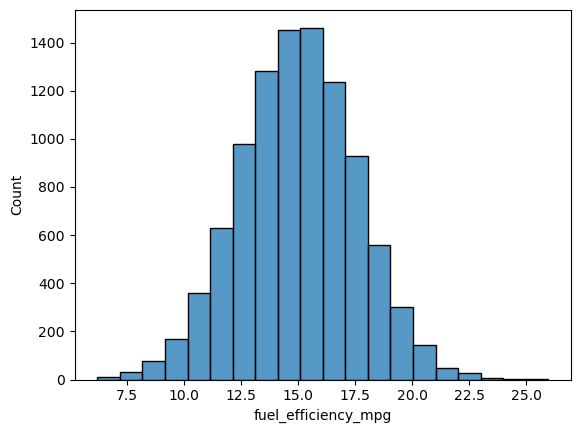

In [6]:
sns.histplot(df.fuel_efficiency_mpg, bins=20)
plt.show()

### Question 1

In [7]:
# Column with missing values
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Question 2

In [8]:
# Median for horsepower column
df.horsepower.median()

149.0

## Setting up Validation framework

In [9]:
n = len(df)
n_val = int(n *0.2)
n_test = int(n *0.2)
n_train = n - n_val - n_test

In [10]:
idx = np.arange(n)


In [11]:
np.random.seed(42)
np.random.shuffle(idx)

In [12]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val ]]
df_test = df.iloc[idx[n_train+n_val:]]

In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [15]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

### Question 3

In [16]:
# Train linear regression model function
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [17]:
# RMSE
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [18]:
# Prepare X function default fill value is 0
def prepare_X(df, fill_value=0):
    df = df.copy()
    df = df.fillna(fill_value)
    X = df.values
    return X

In [19]:
#Filling missing values with with Zero and train
X_train = prepare_X(df_train)

w0, w = train_linear_regression(X_train, y_train)


In [20]:
# Evaluating with validation set
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print("The RMSE for model with null values equals Zero: ", round(rmse(y_val, y_pred), 2))


The RMSE for model with null values equals Zero:  0.52


In [21]:
# Filling missing values with with Mean and train
X_train = prepare_X(df_train, df_train.mean())

w0, w = train_linear_regression(X_train, y_train)

In [22]:
#Evaluating with validation set
X_val = prepare_X(df_val, df_train.mean())

y_pred = w0 + X_val.dot(w)
print("The RMSE for model with null values equals mean: ", round(rmse(y_val, y_pred), 2))

The RMSE for model with null values equals mean:  0.46


### Question 4

In [23]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [24]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = round(rmse(y_val, y_pred), 2)
    
    print(f"For r = {r}, RMSE: ", score)

For r = 0, RMSE:  0.52
For r = 0.01, RMSE:  0.52
For r = 0.1, RMSE:  0.52
For r = 1, RMSE:  0.52
For r = 5, RMSE:  0.52
For r = 10, RMSE:  0.52
For r = 100, RMSE:  0.52


### Question 5

In [25]:
n = len(df)
n_val = int(n *0.2)
n_test = int(n *0.2)
n_train = n - n_val - n_test

idx = np.arange(n)

In [26]:
scores = []


In [27]:

for n in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(n)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    scores.append(score)

In [28]:
std = np.std(scores)
print("The standard deviation of the scores is: ", round(std, 3))

The standard deviation of the scores is:  0.006


### Question 6

In [29]:
n = len(df)
n_val = int(n *0.2)
n_test = int(n *0.2)
n_train = n - n_val - n_test

idx = np.arange(n)

In [30]:
# Set random seed to 9, shuffle the data and train
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']



In [31]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

y_full_train = np.concatenate([y_train, y_val])

In [32]:

X_full_train = prepare_X(df_full_train)
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

print("The RMSE score is:", rmse(y_test, y_pred))

The RMSE score is: 0.5156261299185867
